In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
columns_name=["user_id","item_id","rating","timestamp"]
df=pd.read_csv("ml-100k/u.data",sep='\t',names=columns_name)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df["item_id"].nunique()

1682

In [5]:
movies_title=pd.read_csv("ml-100k/u.item",sep='\|',header=None)[[0,1]]
movies_title.columns=["item_id","title"]
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df=pd.merge(df,movies_title,on="item_id")
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")


In [8]:
df.groupby('title').mean()["rating"].sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [62]:
df.groupby('title').count()["rating"].sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [9]:
ratings=pd.DataFrame(df.groupby('title').mean()["rating"])
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [10]:
ratings["count"]=df.groupby('title').count()["rating"].sort_values(ascending=False)
ratings.sort_values(by="rating",ascending=False)

,rating,count
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


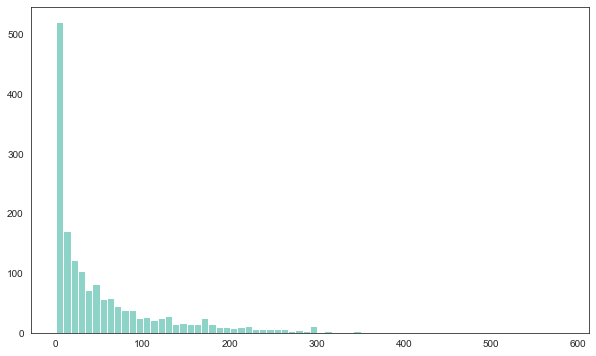

In [11]:
plt.figure(figsize=(10,6))
plt.hist(ratings['count'],bins=70)
plt.show()

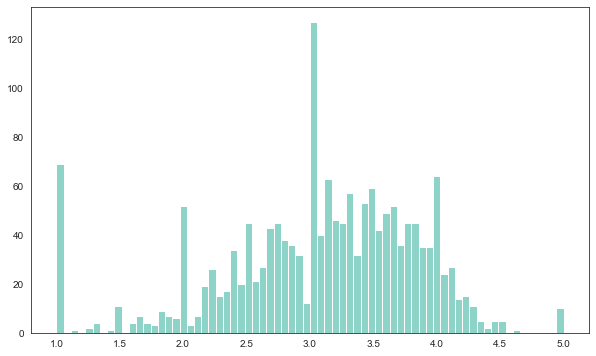

In [12]:
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'],bins=70)
plt.show()

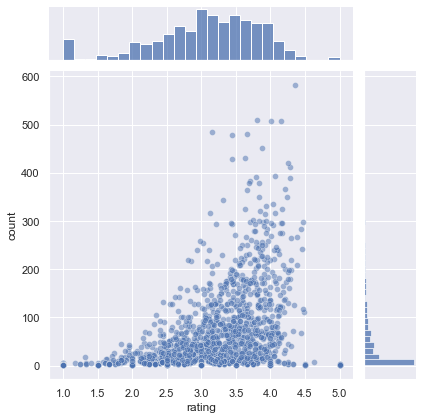

In [13]:
sns.set_theme(style="darkgrid")
sns.jointplot(x='rating',y='count',data=ratings,alpha=0.5)


In [14]:
mat=df.pivot_table(index="user_id",columns="title",values='rating')
mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [15]:
star_wars=mat["Star Wars (1977)"]

In [16]:
similar_star_wars=mat.corrwith(star_wars)

In [17]:
similar_star_wars.sort_values(ascending=False)

title
No Escape (1994)                           1.0
Man of the Year (1995)                     1.0
Hollow Reed (1996)                         1.0
Commandments (1997)                        1.0
Cosi (1996)                                1.0
                                          ... 
Wonderland (1997)                          NaN
Wooden Man's Bride, The (Wu Kui) (1994)    NaN
Yankee Zulu (1994)                         NaN
You So Crazy (1994)                        NaN
Á köldum klaka (Cold Fever) (1994)         NaN
Length: 1664, dtype: float64

In [18]:
corr_star_wars=pd.DataFrame(similar_star_wars,columns=["correlation"])

In [19]:
corr_star_wars.dropna(inplace=True)
corr_star_wars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [20]:
corr_star_wars.sort_values(by='correlation',ascending=False)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [21]:
corr_star_wars=corr_star_wars.join(ratings['count'])

In [22]:
corr_star_wars[corr_star_wars['count']>100].sort_values(by="correlation",ascending=False).head(10)

,correlation,count
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [24]:
def similar(movie_name):
    movie=mat[movie_name]
    corr_movie=pd.DataFrame(mat.corrwith(movie),columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['count'])
    return corr_movie[corr_movie['count']>50].sort_values(by="correlation",ascending=False)


In [26]:
similar("Sting, The (1973)").head(10)

,correlation,count
title,,
"Sting, The (1973)",1.000000,241
Kull the Conqueror (1997),0.636670,69
Nine Months (1995),0.626513,58
Bed of Roses (1996),0.602941,60
Bad Boys (1995),0.601721,57
Money Talks (1997),0.564933,92
Cool Runnings (1993),0.564291,68
Butch Cassidy and the Sundance Kid (1969),0.546303,216
"Jungle Book, The (1994)",0.525516,85
